In [1]:
# DEPENDENCIES

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn
import random
import csv
from citipy import citipy
from api_keys import api_key

In [2]:
# INPUT CSV FILE I DOWNLOADED FROM INTERNET

world_cities = pd.read_csv("worldcities.csv")

# READ CSV

world_cities.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [3]:
# ISOLATE (500) RANDOM CITIES FROM CSV

random_cities = world_cities.sample(n=500)

# VERIFIED THERE WERE (500) CITIES IN LIST THEN REDUCED TO .HEAD()

random_cities.head()

,Country,City,Latitude,Longitude
6679,co,cajamarca,4.441724,-75.426783
26550,pa,santa rita arriba,9.337778,-79.780000
649,at,koflach,47.066667,15.083333
19666,in,udayagiri,20.133333,84.383333
8600,de,bitterfeld,51.616667,12.316667


In [4]:
# BEGIN COUNTER

row_count = 1

# CREATE COLUMNS FOR EACH CATEGORY ANALYZED

random_cities["Temperature"] = ""
random_cities["Humidity"] = ""
random_cities["Cloudiness"] = ""
random_cities["Wind Speed"] = ""

# BEGIN FOR LOOP

for index, row in random_cities.iterrows():
    
    time.sleep(1)
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    
    units = "Imperial"
    
    query_url = url + "lat=" + str(row["Latitude"]) + "&lon=" + str(row["Longitude"]) + "&appid=" + api_key + "&units=" + units
    
    print("Retrieving Data" + str(row_count))
    
    print(query_url)
    
    row_count = row_count + 1
    
    city_weather = requests.get(query_url).json()
    
    try:
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        
        random_cities.set_value(index, "Temperature", temperature)
        random_cities.set_value(index,"Humidity", humidity)
        random_cities.set_value(index,"Cloudiness", cloudiness)
        random_cities.set_value(index,"Wind Speed", wind_speed)
        
    except:
        print("ERROR - SKIP")
        
random_cities

Retrieving Data1
http://api.openweathermap.org/data/2.5/weather?lat=4.441724&lon=-75.426783&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Retrieving Data2
http://api.openweathermap.org/data/2.5/weather?lat=9.337777800000001&lon=-79.78&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data3
http://api.openweathermap.org/data/2.5/weather?lat=47.066666999999995&lon=15.083332999999998&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data4
http://api.openweathermap.org/data/2.5/weather?lat=20.133333&lon=84.383333&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data5
http://api.openweathermap.org/data/2.5/weather?lat=51.616667&lon=12.316667&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data6
http://api.openweathermap.org/data/2.5/weather?lat=45.571389&lon=21.976667000000003&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data7
http://api.openweathermap.org/data/2.5/weather?lat=46.383333&lon=21.3&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data8
http://api.openweathermap.org/data/2.5/weather?lat=3.022247&lon=-73.404402&appid

Retrieving Data57
http://api.openweathermap.org/data/2.5/weather?lat=52.9821&lon=84.6757&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data58
http://api.openweathermap.org/data/2.5/weather?lat=38.6763889&lon=-121.3352778&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data59
http://api.openweathermap.org/data/2.5/weather?lat=18.1419444&lon=-66.2663889&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data60
http://api.openweathermap.org/data/2.5/weather?lat=19.483333&lon=-101.333333&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data61
http://api.openweathermap.org/data/2.5/weather?lat=43.866667&lon=-79.866667&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data62
http://api.openweathermap.org/data/2.5/weather?lat=7.245833&lon=124.26638899999999&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data63
http://api.openweathermap.org/data/2.5/weather?lat=-26.583333000000003&lon=-55.6333329

Retrieving Data112
http://api.openweathermap.org/data/2.5/weather?lat=45.206389&lon=42.023610999999995&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data113
http://api.openweathermap.org/data/2.5/weather?lat=-33.917988&lon=25.570066&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data114
http://api.openweathermap.org/data/2.5/weather?lat=14.816667&lon=120.9&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data115
http://api.openweathermap.org/data/2.5/weather?lat=-9.233333300000002&lon=33.6166667&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data116
http://api.openweathermap.org/data/2.5/weather?lat=-27.108760999999998&lon=152.949066&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data117
http://api.openweathermap.org/data/2.5/weather?lat=20.066667000000002&lon=-97.866667&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data118
http://api.openweathermap.org/data/2.5/weather?lat=45.4&

Retrieving Data167
http://api.openweathermap.org/data/2.5/weather?lat=57.89785500000001&lon=53.71520699999999&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data168
http://api.openweathermap.org/data/2.5/weather?lat=49.188893&lon=29.526971000000003&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data169
http://api.openweathermap.org/data/2.5/weather?lat=47.15&lon=23.866667&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data170
http://api.openweathermap.org/data/2.5/weather?lat=-16.283333&lon=-39.033333&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data171
http://api.openweathermap.org/data/2.5/weather?lat=39.415009999999995&lon=-8.821886&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data172
http://api.openweathermap.org/data/2.5/weather?lat=33.8158333&lon=-78.6802778&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data173
http://api.openweathermap.org/data/2.5/weather?lat=5.78013

Retrieving Data222
http://api.openweathermap.org/data/2.5/weather?lat=23.533333&lon=88.4&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data223
http://api.openweathermap.org/data/2.5/weather?lat=22.166667&lon=71.666667&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data224
http://api.openweathermap.org/data/2.5/weather?lat=49.987839&lon=29.531291999999997&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data225
http://api.openweathermap.org/data/2.5/weather?lat=19.9&lon=77.583333&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data226
http://api.openweathermap.org/data/2.5/weather?lat=6.883333299999999&lon=73.1&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data227
http://api.openweathermap.org/data/2.5/weather?lat=55.461073999999996&lon=9.8794&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data228
http://api.openweathermap.org/data/2.5/weather?lat=11.183333300000001&lon=-60.7333333

Retrieving Data278
http://api.openweathermap.org/data/2.5/weather?lat=5.400205000000001&lon=-73.335437&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data279
http://api.openweathermap.org/data/2.5/weather?lat=54.09989399999999&lon=35.342544000000004&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data280
http://api.openweathermap.org/data/2.5/weather?lat=48.166667&lon=22.0&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data281
http://api.openweathermap.org/data/2.5/weather?lat=59.3&lon=9.7&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data282
http://api.openweathermap.org/data/2.5/weather?lat=50.933333000000005&lon=5.1666669999999995&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data283
http://api.openweathermap.org/data/2.5/weather?lat=42.0166667&lon=23.1&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data284
http://api.openweathermap.org/data/2.5/weather?lat=-29.96666699999999

Retrieving Data332
http://api.openweathermap.org/data/2.5/weather?lat=-10.616666699999998&lon=150.66666669999998&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data333
http://api.openweathermap.org/data/2.5/weather?lat=-3.1833332999999997&lon=33.783333299999995&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data334
http://api.openweathermap.org/data/2.5/weather?lat=46.966667&lon=-70.55&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data335
http://api.openweathermap.org/data/2.5/weather?lat=6.55&lon=-72.833333&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data336
http://api.openweathermap.org/data/2.5/weather?lat=-25.2413&lon=-53.983000000000004&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data337
http://api.openweathermap.org/data/2.5/weather?lat=-33.733781&lon=18.975228&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data338
http://api.openweathermap.org/data/2.5/weather?lat=4

Retrieving Data387
http://api.openweathermap.org/data/2.5/weather?lat=47.2152778&lon=-123.09944440000001&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data388
http://api.openweathermap.org/data/2.5/weather?lat=26.933333&lon=-105.4&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data389
http://api.openweathermap.org/data/2.5/weather?lat=32.8833333&lon=36.05&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data390
http://api.openweathermap.org/data/2.5/weather?lat=48.643314000000004&lon=25.737944&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data391
http://api.openweathermap.org/data/2.5/weather?lat=42.05&lon=-82.583333&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data392
http://api.openweathermap.org/data/2.5/weather?lat=47.566666999999995&lon=14.233332999999998&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data393
http://api.openweathermap.org/data/2.5/weather?lat=14.0166666999

Retrieving Data442
http://api.openweathermap.org/data/2.5/weather?lat=38.95&lon=20.75&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data443
http://api.openweathermap.org/data/2.5/weather?lat=53.566667&lon=10.166667&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data444
http://api.openweathermap.org/data/2.5/weather?lat=45.883333&lon=23.8&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data445
http://api.openweathermap.org/data/2.5/weather?lat=22.15&lon=-102.25&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data446
http://api.openweathermap.org/data/2.5/weather?lat=-17.4208333&lon=-70.5133333&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data447
http://api.openweathermap.org/data/2.5/weather?lat=44.171111100000005&lon=17.6575&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data448
http://api.openweathermap.org/data/2.5/weather?lat=35.400556&lon=116.965556&appid=4360abd1fe4da746987

Retrieving Data497
http://api.openweathermap.org/data/2.5/weather?lat=27.9&lon=-0.2833333&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data498
http://api.openweathermap.org/data/2.5/weather?lat=12.505833&lon=39.522778&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data499
http://api.openweathermap.org/data/2.5/weather?lat=-8.5&lon=117.433333&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial
Retrieving Data500
http://api.openweathermap.org/data/2.5/weather?lat=25.85&lon=85.783333&appid=4360abd1fe4da7469871cfd95e5d9a40&units=Imperial


,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
6679,co,cajamarca,4.441724,-75.426783,75.51,61,75,8.05
26550,pa,santa rita arriba,9.337778,-79.780000,86.05,70,40,8.05
649,at,koflach,47.066667,15.083333,78.64,51,20,8.05
19666,in,udayagiri,20.133333,84.383333,73.63,88,100,2.53
8600,de,bitterfeld,51.616667,12.316667,90,24,0,6.93
34356,ro,stiuca,45.571389,21.976667,78.8,44,0,10.29
33459,ro,macea,46.383333,21.300000,78.8,50,0,6.93
7206,co,puerto lleras,3.022247,-73.404402,80.65,88,40,1.01
30332,ph,tagburos,9.827900,118.743000,82.81,76,100,12.64
29650,ph,rimos,16.876400,120.396600,79.03,85,100,4.79


In [6]:
# CREATE DATAFRAME

final_weather = pd.DataFrame(random_cities)

final_weather.head()

,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
6679,co,cajamarca,4.441724,-75.426783,75.51,61,75,8.05
26550,pa,santa rita arriba,9.337778,-79.780000,86.05,70,40,8.05
649,at,koflach,47.066667,15.083333,78.64,51,20,8.05
19666,in,udayagiri,20.133333,84.383333,73.63,88,100,2.53
8600,de,bitterfeld,51.616667,12.316667,90,24,0,6.93


In [14]:
# EXPORT TO CSV FILE

final_weather.to_csv("final_report.csv")

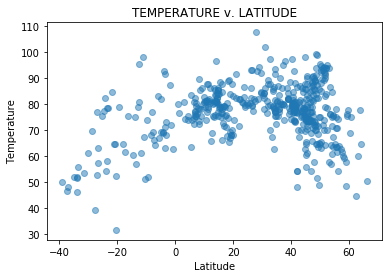

In [10]:
# SCATTER PLOT LAT V TEMPERATURE

plt.scatter(random_cities["Latitude"],random_cities["Temperature"], alpha = 0.5)

plt.title("TEMPERATURE v. LATITUDE")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("Temperature.png")
plt.show()

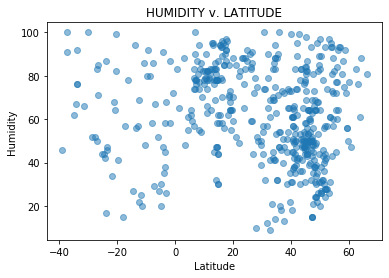

In [11]:
# SCATTER PLOT LAT V HUMIDITY

plt.scatter(random_cities["Latitude"],random_cities["Humidity"], alpha = 0.5)

plt.title("HUMIDITY v. LATITUDE")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.show()

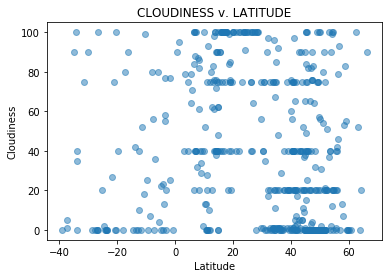

In [12]:
# SCATTER PLOT LAT V CLOUDINESS

plt.scatter(random_cities["Latitude"],random_cities["Cloudiness"], alpha = 0.5)

plt.title("CLOUDINESS v. LATITUDE")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")
plt.show()

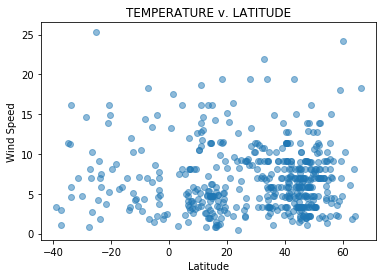

In [13]:
# SCATTER PLOT LAT V WIND SPEED

plt.scatter(random_cities["Latitude"],random_cities["Wind Speed"], alpha = 0.5)

plt.title("TEMPERATURE v. LATITUDE")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Wind.png")
plt.show()